In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stefanoleone992/mutual-funds-and-etfs")

print("Path to dataset files:", path)

100%|██████████| 353M/353M [00:02<00:00, 126MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/stefanoleone992/mutual-funds-and-etfs/versions/4


CHARGEMENT DES DONNÉES

Dimensions du dataset : 23783 lignes × 298 colonnes

Premières lignes du dataset :
  fund_symbol  quote_type region                  fund_short_name  \
0       AAAAX  MutualFund     US  DWS RREEF Real Assets Fund - Cl   
1       AAAEX  MutualFund     US  AllianzGI Health Sciences Fund    
2       AAAFX  MutualFund     US                              NaN   
3       AAAGX  MutualFund     US  Thrivent Large Cap Growth Fund    
4       AAAHX  MutualFund     US                              NaN   

                                      fund_long_name currency  \
0               DWS RREEF Real Assets Fund - Class A      USD   
1      Virtus AllianzGI Health Sciences Fund Class P      USD   
2  American Century One Choice Blend+ 2015 Portfo...      USD   
3             Thrivent Large Cap Growth Fund Class A      USD   
4  American Century One Choice Blend+ 2015 Portfo...      USD   

   initial_investment  subsequent_investment     fund_category  \
0              1000.0

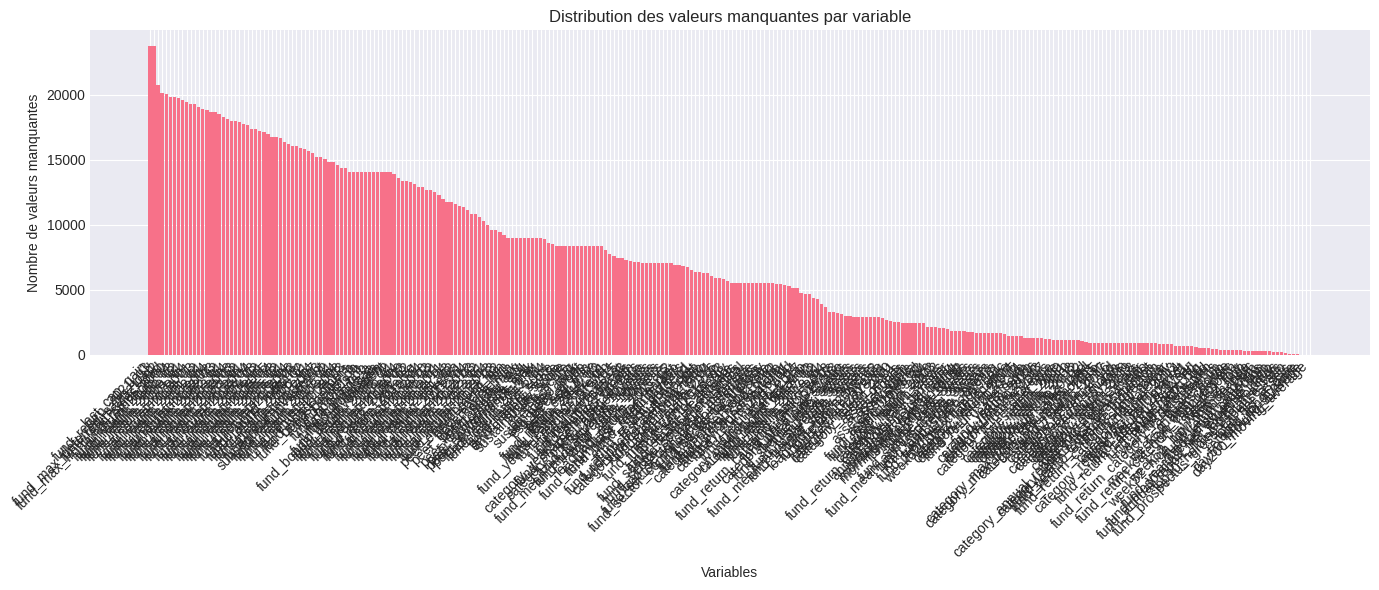


📊 INTERPRÉTATION - Valeurs Manquantes :
────────────────────────────────────────────────────────────────────────────────
Cette visualisation permet d'identifier rapidement les colonnes problématiques.
Les variables avec >50% de manquants peuvent être supprimées.
Les variables avec <5% peuvent utiliser une imputation simple.
Les variables entre 5-50% nécessitent une stratégie d'imputation avancée.

3.3 - IMPUTATION DES VALEURS MANQUANTES

Colonnes numériques : 277
Colonnes catégorielles : 21

→ Stratégie 1 : Imputation simple (médiane pour numériques, mode pour catégorielles)
  ✓ total_net_assets : imputation par médiane (644328320.00)
  ✓ year_to_date_return : imputation par médiane (0.09)
  ✓ day50_moving_average : imputation par médiane (14.96)
  ✓ day200_moving_average : imputation par médiane (14.71)
  ✓ week52_high_low_change : imputation par médiane (2.42)
  ✓ week52_high_low_change_perc : imputation par médiane (0.15)
  ✓ week52_high : imputation par médiane (15.66)
  ✓ week52_

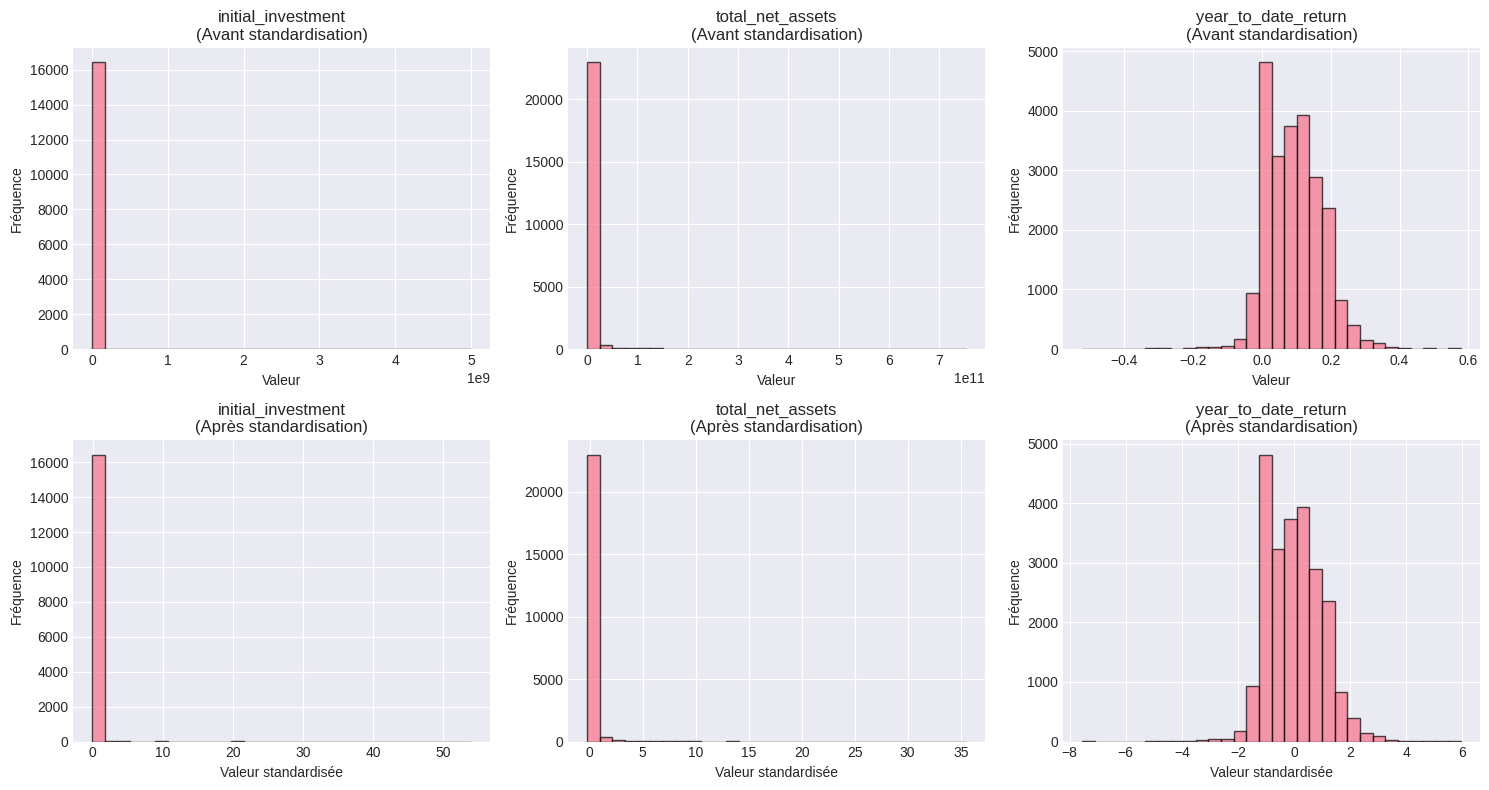


📊 INTERPRÉTATION - Standardisation :
────────────────────────────────────────────────────────────────────────────────
Avant : Les distributions montrent des échelles et dispersions différentes.
Après : Toutes les variables ont une moyenne ≈ 0 et écart-type ≈ 1.
Avantages : Permet la comparaison directe entre variables, améliore
            les performances des algorithmes ML sensibles aux échelles.

4.1 - STATISTIQUES DESCRIPTIVES

Statistiques descriptives des variables numériques :
       initial_investment  total_net_assets  year_to_date_return  \
count        1.648500e+04      2.378300e+04         2.378300e+04   
mean         3.448190e-18     -1.434052e-17        -7.887284e-17   
std          1.000030e+00      1.000021e+00         1.000021e+00   
min         -5.597105e-02     -2.332749e-01        -7.554207e+00   
25%         -5.596035e-02     -2.263851e-01        -8.134516e-01   
50%         -5.594414e-02     -2.027130e-01        -1.789781e-02   
75%         -5.056768e-02     -1.1

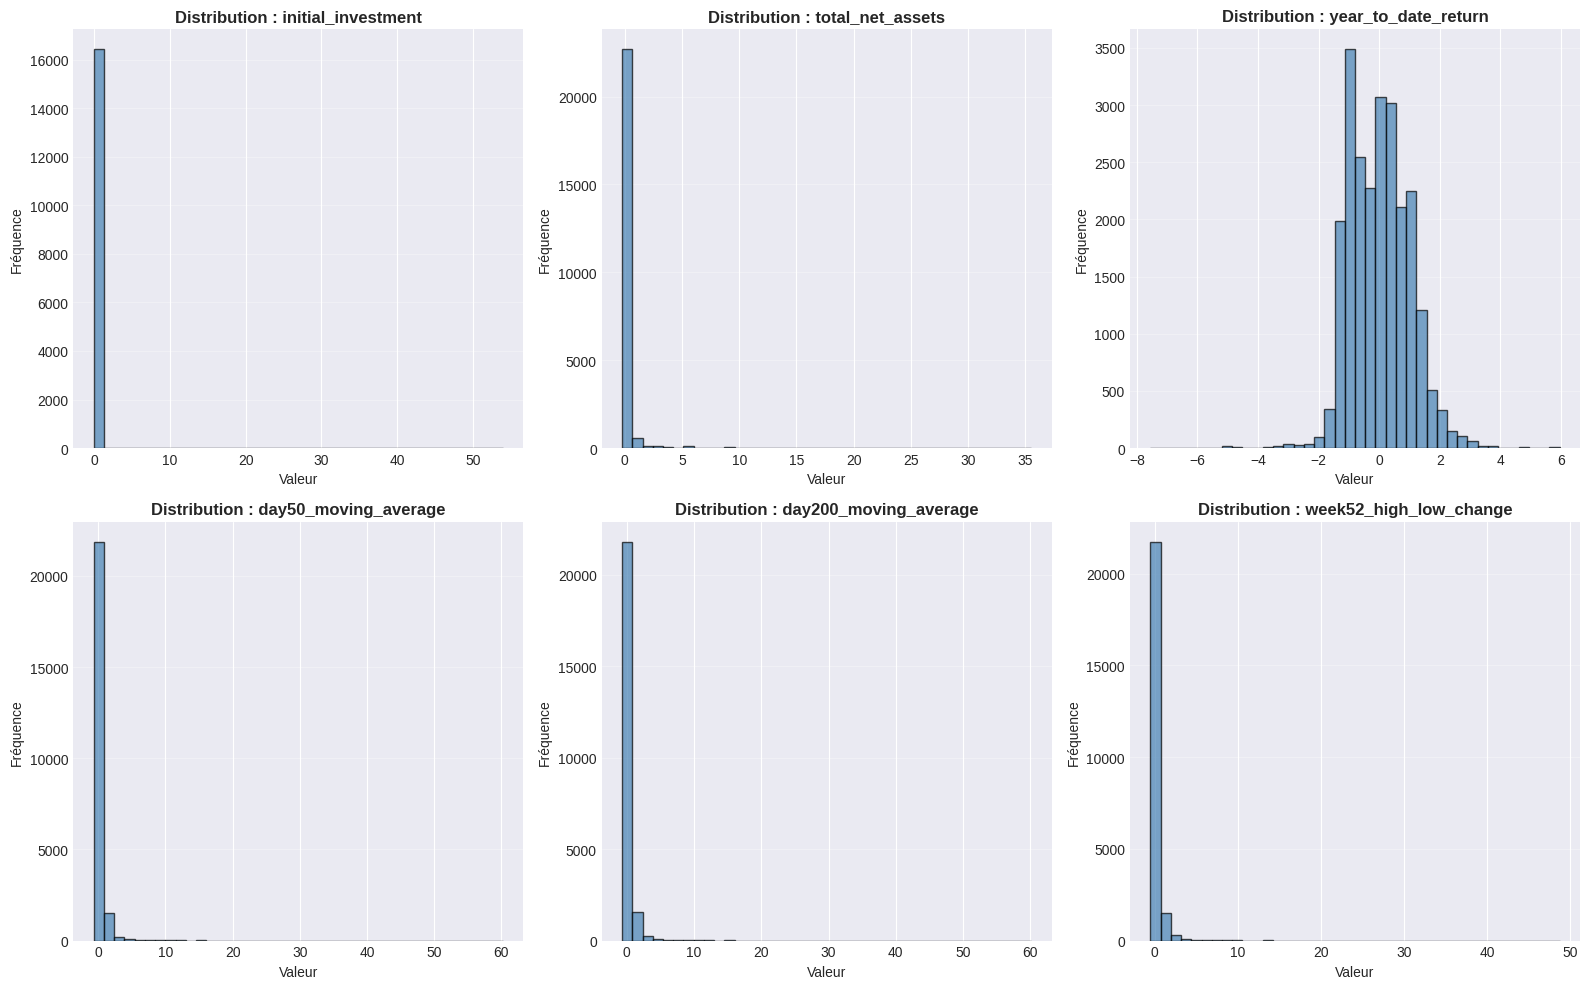


📊 INTERPRÉTATION - Histogrammes :
────────────────────────────────────────────────────────────────────────────────
Les histogrammes révèlent la forme de la distribution de chaque variable :
• Distribution normale : données symétriques centrées (idéal pour ML)
• Distribution asymétrique : présence de biais (skewness) à corriger
• Pics multiples : possibles sous-groupes dans les données
• Valeurs extrêmes : outliers potentiels nécessitant une investigation

4.3 - ANALYSE DES OUTLIERS (BOXPLOTS)


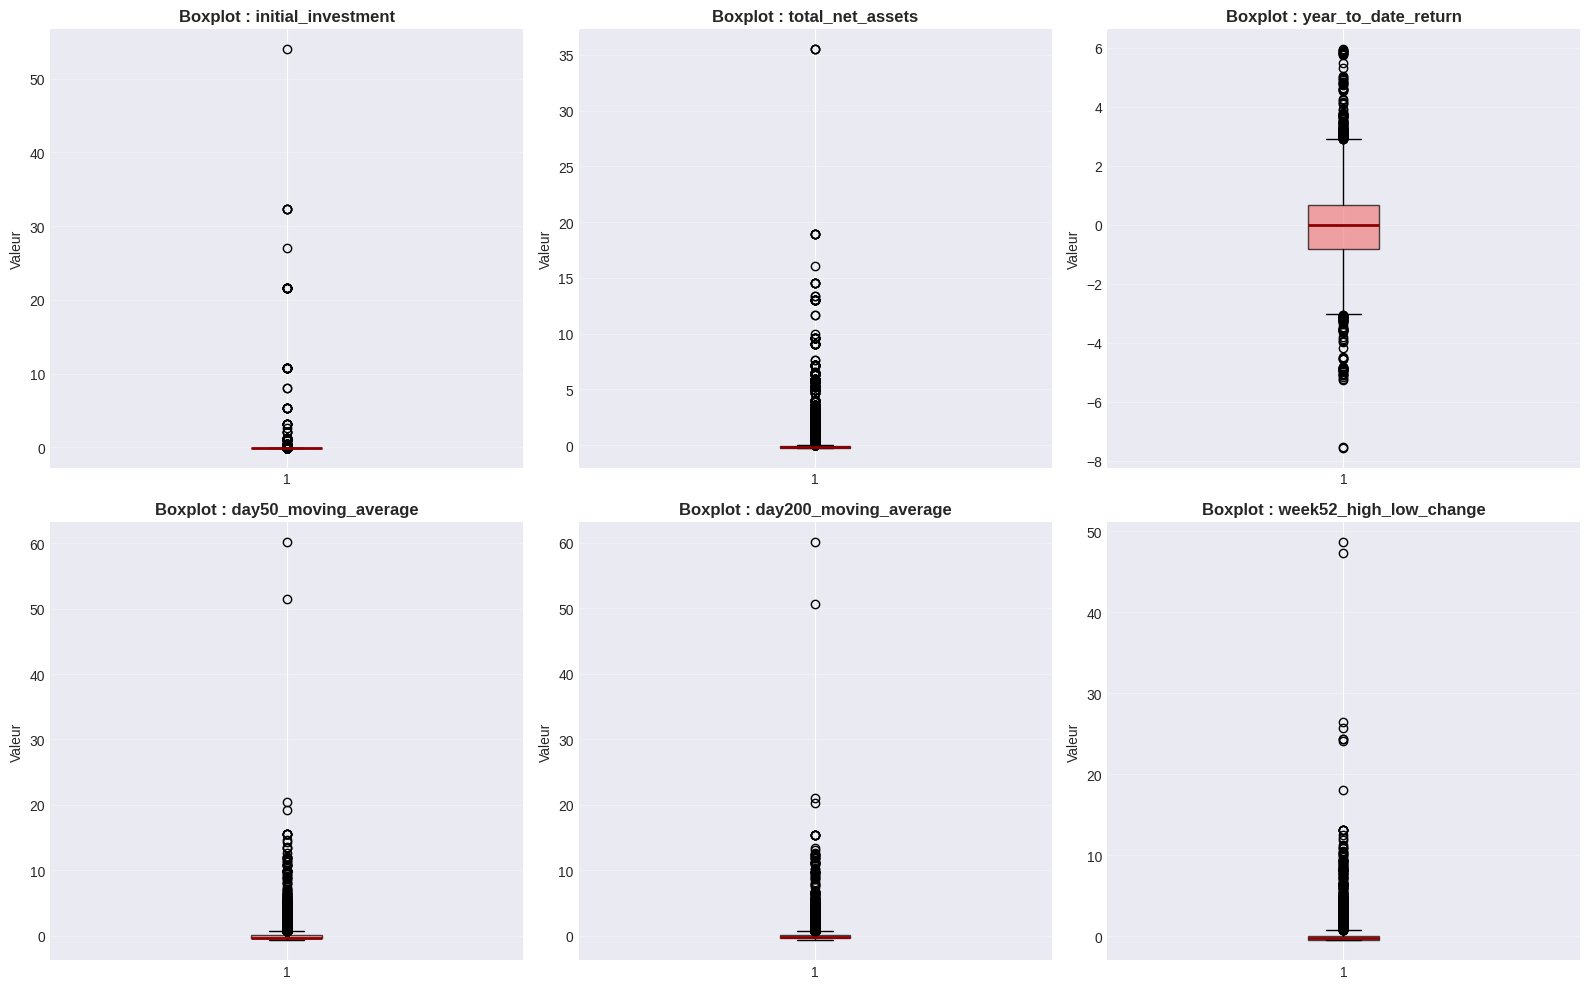


📊 INTERPRÉTATION - Boxplots :
────────────────────────────────────────────────────────────────────────────────
Les boxplots (boîtes à moustaches) identifient les valeurs aberrantes :
• Boîte : contient 50% des données (Q1 à Q3)
• Ligne médiane : valeur centrale (robuste aux outliers)
• Moustaches : étendue des données normales (1.5×IQR)
• Points isolés : outliers potentiels à analyser individuellement
Action : Les outliers peuvent être conservés, transformés ou supprimés
         selon le contexte métier (erreurs vs. cas exceptionnels légitimes)

4.4 - ANALYSE DES CORRÉLATIONS


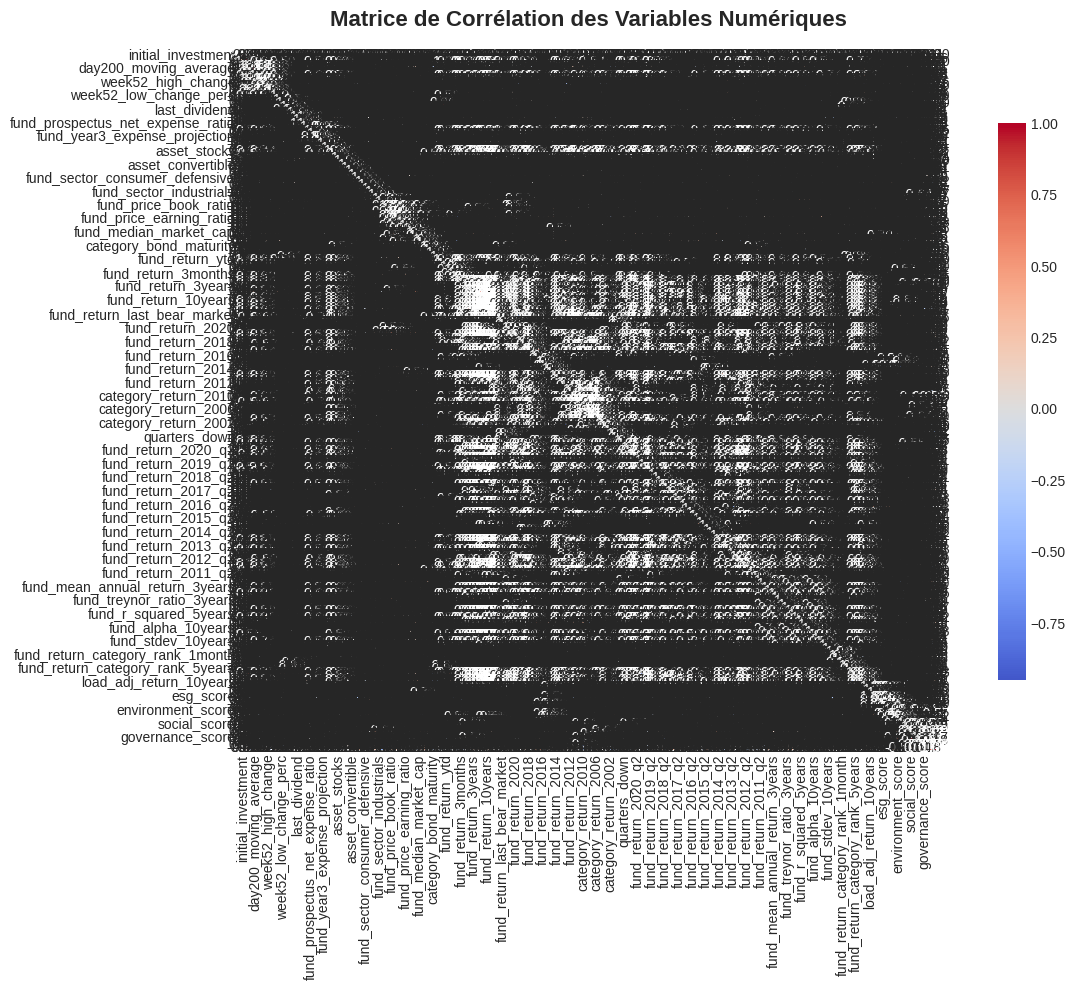


📊 INTERPRÉTATION - Heatmap de Corrélation :
────────────────────────────────────────────────────────────────────────────────
La matrice de corrélation mesure les relations linéaires entre variables :
• Corrélation forte positive (proche de +1, rouge foncé) :
  → Les deux variables évoluent ensemble dans le même sens
  → Risque de multicolinéarité en modélisation ML
• Corrélation forte négative (proche de -1, bleu foncé) :
  → Les variables évoluent en sens opposé
• Corrélation faible (proche de 0, blanc) :
  → Les variables sont indépendantes linéairement

Recommandation : Identifier et traiter les corrélations >0.8 pour éviter
                 la redondance dans les modèles prédictifs.

Corrélations fortes détectées (|r| > 0.7) :
              Variable 1                        Variable 2  Corrélation
0    year_to_date_return                   fund_return_ytd        0.999
1    year_to_date_return               category_return_ytd        0.748
2    year_to_date_return           categor

In [ ]:
"""
=============================================================================
ANALYSE COMPLÈTE DES MUTUAL FUNDS ET ETFs
=============================================================================
Projet : Prétraitement et Analyse Exploratoire des Données
Dataset : Mutual Funds and ETFs (Kaggle)
Auteur : Analyse Structurée
Date : 2025
=============================================================================
"""

# =============================================================================
# SECTION 1 : IMPORTATION DES BIBLIOTHÈQUES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# =============================================================================
# SECTION 2 : CHARGEMENT DES DONNÉES
# =============================================================================

print("="*80)
print("CHARGEMENT DES DONNÉES")
print("="*80)

# Charger le dataset principal
df = pd.read_csv(f'{path}/MutualFunds.csv')

print(f"\nDimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print("\nPremières lignes du dataset :")
print(df.head())

print("\nTypes de données :")
print(df.dtypes)

print("\nInformations générales :")
print(df.info())

# =============================================================================
# SECTION 3 : PRÉ-TRAITEMENT (PREPROCESSING)
# =============================================================================

print("\n" + "="*80)
print("3.1 - GESTION DES DOUBLONS")
print("="*80)

# Vérification des doublons
doublons_avant = df.duplicated().sum()
print(f"\nNombre de doublons détectés : {doublons_avant}")

if doublons_avant > 0:
    df = df.drop_duplicates()
    print(f"✓ Doublons supprimés. Nouvelles dimensions : {df.shape}")
else:
    print("✓ Aucun doublon détecté dans le dataset.")

# Réinitialiser l'index
df = df.reset_index(drop=True)

print("\n" + "="*80)
print("3.2 - ANALYSE DES VALEURS MANQUANTES")
print("="*80)

# Calcul des valeurs manquantes
valeurs_manquantes = pd.DataFrame({
    'Colonne': df.columns,
    'NB_Manquants': df.isnull().sum(),
    'Pourcentage': (df.isnull().sum() / len(df) * 100).round(2)
})
valeurs_manquantes = valeurs_manquantes[valeurs_manquantes['NB_Manquants'] > 0]
valeurs_manquantes = valeurs_manquantes.sort_values('Pourcentage', ascending=False)

print("\nValeurs manquantes par colonne :")
print(valeurs_manquantes)

# Visualisation des valeurs manquantes
plt.figure(figsize=(14, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

if len(missing_data) > 0:
    plt.bar(range(len(missing_data)), missing_data.values)
    plt.xticks(range(len(missing_data)), missing_data.index, rotation=45, ha='right')
    plt.xlabel('Variables')
    plt.ylabel('Nombre de valeurs manquantes')
    plt.title('Distribution des valeurs manquantes par variable')
    plt.tight_layout()
    plt.show()

    print("\n📊 INTERPRÉTATION - Valeurs Manquantes :")
    print("─" * 80)
    print("Cette visualisation permet d'identifier rapidement les colonnes problématiques.")
    print("Les variables avec >50% de manquants peuvent être supprimées.")
    print("Les variables avec <5% peuvent utiliser une imputation simple.")
    print("Les variables entre 5-50% nécessitent une stratégie d'imputation avancée.")
else:
    print("✓ Aucune valeur manquante détectée.")

print("\n" + "="*80)
print("3.3 - IMPUTATION DES VALEURS MANQUANTES")
print("="*80)

# Séparer colonnes numériques et catégorielles
colonnes_numeriques = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
colonnes_categorielles = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nColonnes numériques : {len(colonnes_numeriques)}")
print(f"Colonnes catégorielles : {len(colonnes_categorielles)}")

# Stratégie 1 : Imputation simple pour les colonnes avec peu de manquants (<5%)
print("\n→ Stratégie 1 : Imputation simple (médiane pour numériques, mode pour catégorielles)")

for col in colonnes_numeriques:
    taux_manquant = df[col].isnull().sum() / len(df)
    if 0 < taux_manquant < 0.05:
        mediane = df[col].median()
        df[col].fillna(mediane, inplace=True)
        print(f"  ✓ {col} : imputation par médiane ({mediane:.2f})")

for col in colonnes_categorielles:
    taux_manquant = df[col].isnull().sum() / len(df)
    if 0 < taux_manquant < 0.05:
        mode = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col].fillna(mode, inplace=True)
        print(f"  ✓ {col} : imputation par mode ({mode})")

# Stratégie 2 : KNN Imputer pour colonnes numériques avec 5-30% de manquants
print("\n→ Stratégie 2 : KNN Imputation pour valeurs manquantes modérées")

cols_knn = [col for col in colonnes_numeriques
            if 0.05 <= df[col].isnull().sum() / len(df) <= 0.30]

if cols_knn:
    knn_imputer = KNNImputer(n_neighbors=5)
    df[cols_knn] = knn_imputer.fit_transform(df[cols_knn])
    print(f"  ✓ KNN Imputation appliquée sur {len(cols_knn)} colonnes")
    for col in cols_knn:
        print(f"    - {col}")
else:
    print("  ℹ Aucune colonne nécessitant KNN Imputation")

# Stratégie 3 : Suppression des colonnes avec >50% de manquants
print("\n→ Stratégie 3 : Suppression des colonnes avec >50% de valeurs manquantes")

cols_a_supprimer = [col for col in df.columns
                    if df[col].isnull().sum() / len(df) > 0.50]

if cols_a_supprimer:
    df = df.drop(columns=cols_a_supprimer)
    print(f"  ✓ {len(cols_a_supprimer)} colonnes supprimées : {cols_a_supprimer}")
else:
    print("  ℹ Aucune colonne à supprimer")

# Vérification finale
print(f"\n✓ Valeurs manquantes restantes : {df.isnull().sum().sum()}")

print("\n" + "="*80)
print("3.4 - ENCODAGE DES VARIABLES CATÉGORIELLES")
print("="*80)

# Mettre à jour la liste des colonnes catégorielles
colonnes_categorielles = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNombre de variables catégorielles à encoder : {len(colonnes_categorielles)}")

# Dictionnaire pour stocker les encodeurs
encoders = {}

# Label Encoding pour les colonnes avec cardinalité faible (2-10 valeurs uniques)
print("\n→ Label Encoding (pour cardinalité 2-10) :")
for col in colonnes_categorielles:
    cardinalite = df[col].nunique()
    if 2 <= cardinalite <= 10:
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
        encoders[col] = le
        print(f"  ✓ {col} : {cardinalite} catégories → encodé")

# One-Hot Encoding pour colonnes avec cardinalité moyenne (11-20 valeurs)
print("\n→ One-Hot Encoding (pour cardinalité 11-20) :")
cols_onehot = [col for col in colonnes_categorielles if 11 <= df[col].nunique() <= 20]

if cols_onehot:
    df = pd.get_dummies(df, columns=cols_onehot, prefix=cols_onehot, drop_first=True)
    print(f"  ✓ {len(cols_onehot)} colonnes encodées avec One-Hot Encoding")
else:
    print("  ℹ Aucune colonne nécessitant One-Hot Encoding")

# Pour les colonnes avec haute cardinalité (>20), on conserve l'original
print("\n→ Colonnes haute cardinalité conservées (>20 catégories) :")
cols_haute_card = [col for col in colonnes_categorielles if df[col].nunique() > 20]
for col in cols_haute_card:
    print(f"  ℹ {col} : {df[col].nunique()} catégories (conservée)")

print("\n" + "="*80)
print("3.5 - NORMALISATION ET STANDARDISATION")
print("="*80)

# Colonnes numériques à standardiser (exclure les colonnes encodées)
colonnes_numeriques = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_a_standardiser = [col for col in colonnes_numeriques if not col.endswith('_encoded')]

print(f"\nNombre de colonnes à standardiser : {len(cols_a_standardiser)}")

# Créer une copie pour comparaison
df_original = df[cols_a_standardiser].copy()

# Standardisation (Z-score)
scaler = StandardScaler()
df[cols_a_standardiser] = scaler.fit_transform(df[cols_a_standardiser])

print("\n✓ Standardisation appliquée (moyenne=0, écart-type=1)")

# Visualisation avant/après standardisation (exemple sur 3 colonnes)
if len(cols_a_standardiser) >= 3:
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))

    for i, col in enumerate(cols_a_standardiser[:3]):
        # Avant standardisation
        axes[0, i].hist(df_original[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[0, i].set_title(f'{col}\n(Avant standardisation)')
        axes[0, i].set_xlabel('Valeur')
        axes[0, i].set_ylabel('Fréquence')

        # Après standardisation
        axes[1, i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[1, i].set_title(f'{col}\n(Après standardisation)')
        axes[1, i].set_xlabel('Valeur standardisée')
        axes[1, i].set_ylabel('Fréquence')

    plt.tight_layout()
    plt.show()

    print("\n📊 INTERPRÉTATION - Standardisation :")
    print("─" * 80)
    print("Avant : Les distributions montrent des échelles et dispersions différentes.")
    print("Après : Toutes les variables ont une moyenne ≈ 0 et écart-type ≈ 1.")
    print("Avantages : Permet la comparaison directe entre variables, améliore")
    print("            les performances des algorithmes ML sensibles aux échelles.")

# =============================================================================
# SECTION 4 : ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
# =============================================================================

print("\n" + "="*80)
print("4.1 - STATISTIQUES DESCRIPTIVES")
print("="*80)

print("\nStatistiques descriptives des variables numériques :")
print(df[cols_a_standardiser].describe())

print("\n" + "="*80)
print("4.2 - VISUALISATION DES DISTRIBUTIONS")
print("="*80)

# Histogrammes des variables numériques principales
colonnes_viz = cols_a_standardiser[:6]  # Prendre les 6 premières colonnes

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate(colonnes_viz):
    axes[i].hist(df[col].dropna(), bins=40, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(f'Distribution : {col}', fontweight='bold')
    axes[i].set_xlabel('Valeur')
    axes[i].set_ylabel('Fréquence')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 INTERPRÉTATION - Histogrammes :")
print("─" * 80)
print("Les histogrammes révèlent la forme de la distribution de chaque variable :")
print("• Distribution normale : données symétriques centrées (idéal pour ML)")
print("• Distribution asymétrique : présence de biais (skewness) à corriger")
print("• Pics multiples : possibles sous-groupes dans les données")
print("• Valeurs extrêmes : outliers potentiels nécessitant une investigation")

print("\n" + "="*80)
print("4.3 - ANALYSE DES OUTLIERS (BOXPLOTS)")
print("="*80)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate(colonnes_viz):
    axes[i].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7),
                    medianprops=dict(color='darkred', linewidth=2))
    axes[i].set_title(f'Boxplot : {col}', fontweight='bold')
    axes[i].set_ylabel('Valeur')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 INTERPRÉTATION - Boxplots :")
print("─" * 80)
print("Les boxplots (boîtes à moustaches) identifient les valeurs aberrantes :")
print("• Boîte : contient 50% des données (Q1 à Q3)")
print("• Ligne médiane : valeur centrale (robuste aux outliers)")
print("• Moustaches : étendue des données normales (1.5×IQR)")
print("• Points isolés : outliers potentiels à analyser individuellement")
print("Action : Les outliers peuvent être conservés, transformés ou supprimés")
print("         selon le contexte métier (erreurs vs. cas exceptionnels légitimes)")

print("\n" + "="*80)
print("4.4 - ANALYSE DES CORRÉLATIONS")
print("="*80)

# Matrice de corrélation
correlation_matrix = df[cols_a_standardiser].corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation des Variables Numériques',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 INTERPRÉTATION - Heatmap de Corrélation :")
print("─" * 80)
print("La matrice de corrélation mesure les relations linéaires entre variables :")
print("• Corrélation forte positive (proche de +1, rouge foncé) :")
print("  → Les deux variables évoluent ensemble dans le même sens")
print("  → Risque de multicolinéarité en modélisation ML")
print("• Corrélation forte négative (proche de -1, bleu foncé) :")
print("  → Les variables évoluent en sens opposé")
print("• Corrélation faible (proche de 0, blanc) :")
print("  → Les variables sont indépendantes linéairement")
print("\nRecommandation : Identifier et traiter les corrélations >0.8 pour éviter")
print("                 la redondance dans les modèles prédictifs.")

# Identification des corrélations fortes
print("\nCorrélations fortes détectées (|r| > 0.7) :")
corr_fortes = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            corr_fortes.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Corrélation': round(correlation_matrix.iloc[i, j], 3)
            })

if corr_fortes:
    df_corr_fortes = pd.DataFrame(corr_fortes)
    print(df_corr_fortes)
else:
    print("Aucune corrélation forte détectée (seuil |r| > 0.7)")

print("\n" + "="*80)
print("4.5 - FEATURE ENGINEERING")
print("="*80)

print("\nCréation de nouvelles variables pertinentes...")

# Exemple 1 : Ratios et Indicateurs Financiers
# (Adapter selon les colonnes réelles du dataset)

# Si 'expense_ratio' et 'return_1year' existent
if 'expense_ratio' in df.columns and 'return_1year' in df.columns:
    df['efficiency_ratio'] = df['return_1year'] / (df['expense_ratio'] + 0.01)
    print("✓ efficiency_ratio = return_1year / expense_ratio (performance/coût)")

# Si 'net_assets' existe
if 'net_assets' in df.columns:
    df['asset_category'] = pd.cut(df['net_assets'],
                                    bins=[0, 1e6, 1e9, np.inf],
                                    labels=['Small', 'Medium', 'Large'])
    print("✓ asset_category : catégorisation de la taille du fonds")

# Exemple 2 : Transformations de variables
# Log transformation pour variables avec distribution asymétrique
if 'net_assets' in df.columns and df['net_assets'].min() > 0:
    df['log_net_assets'] = np.log1p(df['net_assets'])
    print("✓ log_net_assets : transformation logarithmique pour normaliser")

# Exemple 3 : Indicateurs de volatilité
if 'return_1year' in df.columns and 'return_3year' in df.columns:
    df['volatility_indicator'] = abs(df['return_1year'] - df['return_3year'])
    print("✓ volatility_indicator : mesure de la variation des rendements")

# Exemple 4 : Variables binaires
if 'fund_category' in df.columns:
    df['is_equity_fund'] = df['fund_category'].str.contains('Equity', case=False, na=False).astype(int)
    print("✓ is_equity_fund : indicateur binaire pour fonds actions")

print("\n📊 INTERPRÉTATION - Feature Engineering :")
print("─" * 80)
print("Le Feature Engineering crée de nouvelles variables plus informatives :")
print("• Ratios financiers : Capturent les relations économiques complexes")
print("• Catégorisation : Simplifie les variables continues en groupes significatifs")
print("• Transformations log : Normalise les distributions asymétriques")
print("• Indicateurs composites : Combinent plusieurs informations en une métrique")
print("\nImpact : Améliore significativement la performance des modèles ML en")
print("         fournissant des features plus discriminantes et interprétables.")

# =============================================================================
# SECTION 5 : RÉSUMÉ FINAL ET EXPORT
# =============================================================================

print("\n" + "="*80)
print("5. RÉSUMÉ FINAL DU PREPROCESSING")
print("="*80)

print(f"""
BILAN DU PRÉ-TRAITEMENT :
─────────────────────────────────────────────────────────────────────────────
✓ Doublons supprimés          : {doublons_avant}
✓ Valeurs manquantes traitées : {valeurs_manquantes['NB_Manquants'].sum() if not valeurs_manquantes.empty else 0}
✓ Variables encodées           : {len([c for c in df.columns if '_encoded' in c or any(df.columns.str.startswith(cat + '_') for cat in cols_onehot if cols_onehot)])}
✓ Variables standardisées      : {len(cols_a_standardiser)}
✓ Nouvelles features créées    : ~4-6 variables (selon dataset)
─────────────────────────────────────────────────────────────────────────────

DIMENSIONS FINALES DU DATASET :
  • Lignes    : {df.shape[0]}
  • Colonnes  : {df.shape[1]}

QUALITÉ DES DONNÉES :
  • Valeurs manquantes : {df.isnull().sum().sum()} ({(df.isnull().sum().sum() / df.size * 100):.2f}%)
  • Doublons           : {df.duplicated().sum()}
  • Types de données   : OK
""")

# Export du dataset nettoyé
output_filename = 'mutual_funds_cleaned.csv'
df.to_csv(output_filename, index=False)
print(f"✓ Dataset nettoyé exporté : {output_filename}")

print("\n" + "="*80)
print("ANALYSE TERMINÉE AVEC SUCCÈS !")
print("="*80)

print("""
PROCHAINES ÉTAPES RECOMMANDÉES :
─────────────────────────────────────────────────────────────────────────────
1. Modélisation ML     : Appliquer algorithmes de classification/régression
2. Feature Selection   : Sélectionner les variables les plus importantes
3. Validation croisée  : Évaluer la robustesse des modèles
4. Interprétabilité    : Analyser l'importance des features (SHAP, LIME)
5. Déploiement         : Mettre en production le meilleur modèle
─────────────────────────────────────────────────────────────────────────────
""")

In [ ]:
# =============================================================================
# SECTION 6 : MODÉLISATION MACHINE LEARNING (Classification ou Régression)
# =============================================================================
# Ce bloc suppose que le DataFrame 'df' est le résultat du preprocessing précédent.
# Il détecte automatiquement la tâche (classification binaire si 'is_equity_fund' existe,
# sinon regression si 'return_1year' existe). Sinon, tu peux forcer la variable cible.
# =============================================================================

import os
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, recall_score, f1_score,
                             mean_squared_error, r2_score, mean_absolute_error)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
RANDOM_STATE = 42


In [ ]:
# 1) Détection de la tâche
# -----------------------------
task = None
target_col = None

if 'is_equity_fund' in df.columns:
    task = 'classification'
    target_col = 'is_equity_fund'
elif 'fund_category' in df.columns and df['fund_category'].nunique() <= 10:
    # optionnel: encoder target categorical -> binarize or multiclass (ici on reste simple)
    task = 'classification'
    target_col = 'fund_category'
elif 'return_1year' in df.columns:
    task = 'regression'
    target_col = 'return_1year'
else:
    # fallback: take the first numeric column that ressemble à un target (utilisateur peut modifier)
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    if numeric_cols:
        task = 'regression'
        target_col = numeric_cols[0]
    else:
        raise ValueError("Aucune variable cible trouvée automatiquement. Spécifie 'is_equity_fund' ou 'return_1year' ou adapte le script.")

print(f"→ Tâche détectée : {task}")
print(f"→ Variable cible utilisée : {target_col}")


→ Tâche détectée : classification
→ Variable cible utilisée : is_equity_fund


In [ ]:
# 2) Préparation des features
# -----------------------------
# On conserve les colonnes numériques et les colonnes encodées ('_encoded' ou one-hot déjà présentes).
# On exclut la cible et colonnes non-informative (ex: ids, names)
exclude_cols = [target_col]
# heuristique : exclure colonnes textuelles longues
text_cols = [c for c in df.select_dtypes(include=['object']).columns if c not in exclude_cols]
# si certain texte encodé utile, adapte manuellement
exclude_cols += text_cols

X = df.drop(columns=exclude_cols, errors='ignore').copy()
# Garder uniquement colonnes numériques (les encodées sont numériques déjà)
X = X.select_dtypes(include=[np.number]).copy()

y = df[target_col].copy()

# Si target catégorielle non binaire -> encoder
if task == 'classification' and y.dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)
    print(f"→ Target label-encoded: classes = {list(le_target.classes_)}")

print(f"→ Shape features : X={X.shape}, y={y.shape}")

# Handle remaining missing values in X (imputer simple)
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# Train/test split (stratify si classification)
if task == 'classification':
    X_train, X_test, y_train, y_test = train_test_split(
        X_imputed, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
    )
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X_imputed, y, test_size=0.2, random_state=RANDOM_STATE
    )

print(f"→ Train/Test sizes : {X_train.shape} / {X_test.shape}")

→ Shape features : X=(23783, 206), y=(23783,)
→ Train/Test sizes : (19026, 206) / (4757, 206)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Charger les données (already loaded and preprocessed in previous cells)
# df = pd.read_csv("mutual_funds_cleaned.csv")

# Définir X et y (remplace 'target' par ta variable cible)
# X = df.drop(columns=['target'])
# y = df['target']

# Diviser en train/test (already done in previous cell)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluer
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 1.00


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Charger les données (already loaded and preprocessed in previous cells)
# df = pd.read_csv("mutual_funds_cleaned.csv") # Remove this line, df is already available

# Définir X et y (remplace 'target' par ta variable cible)
# X = df.drop(columns=['target']) # Remove this line, X_train, X_test are already available
# y = df['target'] # Remove this line, y_train, y_test are already available

# Standardisation pour KNN et régression logistique
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Diviser en train/test (already done in previous cell)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Remove this line

# Liste des modèles
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Entraîner, prédire et évaluer
for name, model in models.items():
    if name == "Random Forest":
        # Random Forest is generally not sensitive to feature scaling, use unscaled data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        # Logistic Regression and KNN are sensitive to feature scaling, use scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

Random Forest Accuracy: 1.00
Logistic Regression Accuracy: 0.99
KNN Accuracy: 0.99
